In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7fc75edb9e90>)

In [3]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
11/01/2019 12:00:00 AM,12,7,5
11/01/2019 01:00:00 AM,7,0,7
11/01/2019 02:00:00 AM,1,0,1
11/01/2019 03:00:00 AM,6,6,0
11/01/2019 04:00:00 AM,6,5,1
11/01/2019 05:00:00 AM,20,9,11
11/01/2019 06:00:00 AM,97,43,54
11/01/2019 07:00:00 AM,299,120,179
11/01/2019 08:00:00 AM,583,261,322


In [4]:
import pandas as pd
data = pd.read_csv("Fremont.csv")
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [5]:
data = pd.read_csv("Fremont.csv", index_col="Fremont Bridge Total")
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Fremont Bridge Total,,,
12.0,11/01/2019 12:00:00 AM,7.0,5.0
7.0,11/01/2019 01:00:00 AM,0.0,7.0
1.0,11/01/2019 02:00:00 AM,0.0,1.0
6.0,11/01/2019 03:00:00 AM,6.0,0.0
6.0,11/01/2019 04:00:00 AM,5.0,1.0


In [6]:
data = pd.read_csv("Fremont.csv", index_col="Date") # the dates are still in strings
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
11/01/2019 12:00:00 AM,12.0,7.0,5.0
11/01/2019 01:00:00 AM,7.0,0.0,7.0
11/01/2019 02:00:00 AM,1.0,0.0,1.0
11/01/2019 03:00:00 AM,6.0,6.0,0.0
11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [7]:
data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates = True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


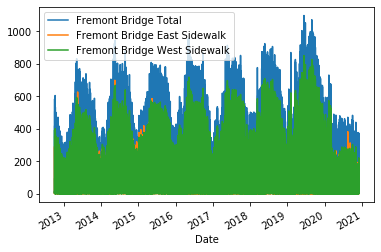

In [8]:
# visualisation
%matplotlib inline
# put all the plots in the notebook itself, rather than separate windows
data.plot()

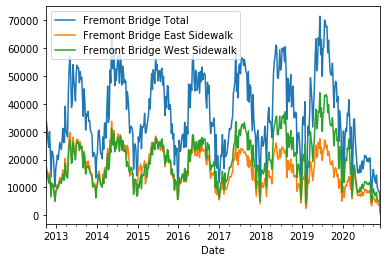

In [9]:
data.resample('W').sum().plot()

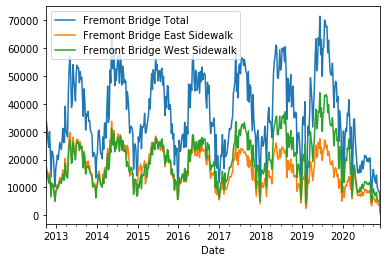

In [10]:
%matplotlib inline
data.resample('W').sum().plot()

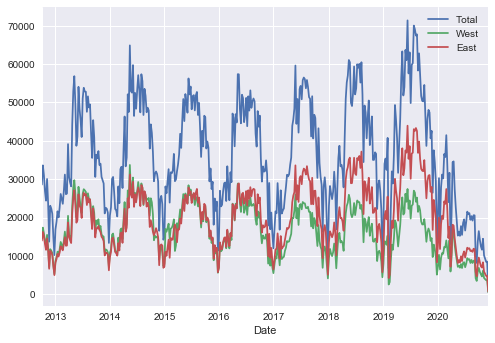

In [11]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
data.columns = ['Total','West','East']
data.resample('W').sum().plot()

In [12]:
data.head()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


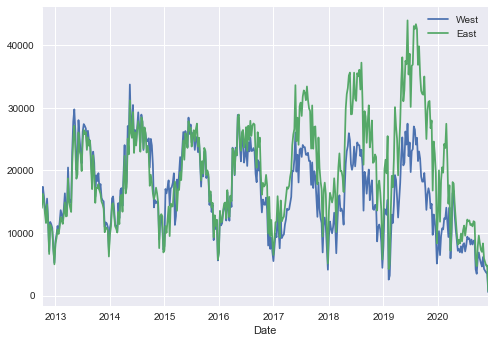

In [13]:
del data['Total']
data.resample('W').sum().plot()

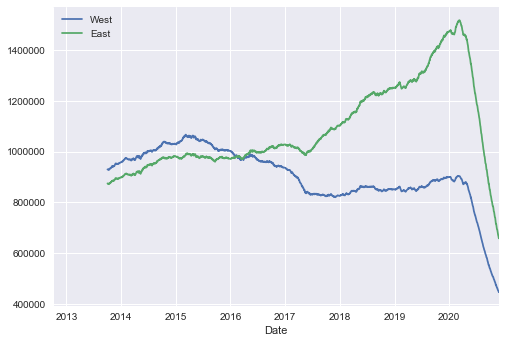

In [14]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 1570883.8)

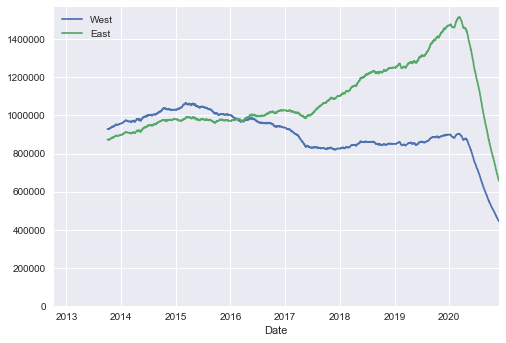

In [15]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None) # setting bottom line of y to be y = 0

(0, 2519182.9)

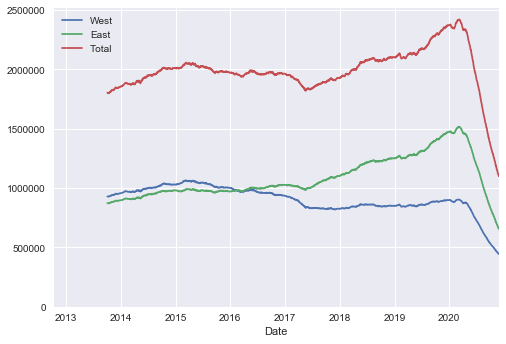

In [16]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None) # setting bottom line of y to be y = 0

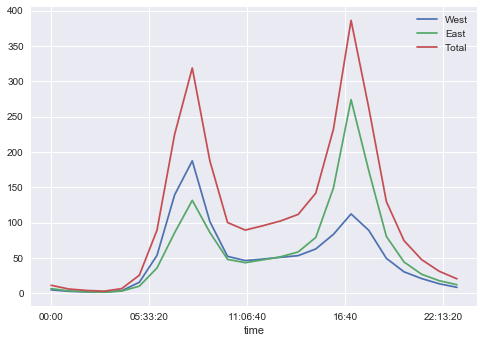

In [17]:
# look at trends at individual days
data.groupby(data.index.time).mean().plot()

In [18]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


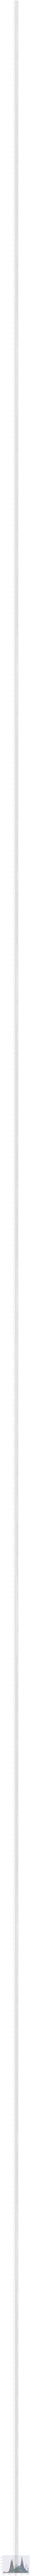

In [19]:
pivoted.plot()

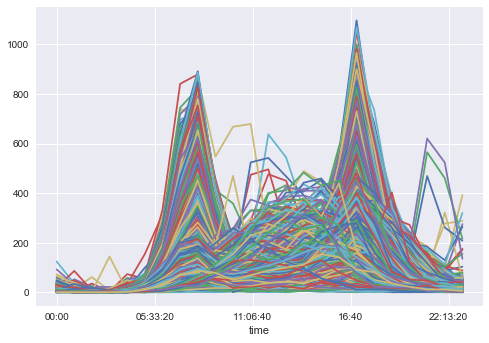

In [20]:
pivoted.plot(legend=False)

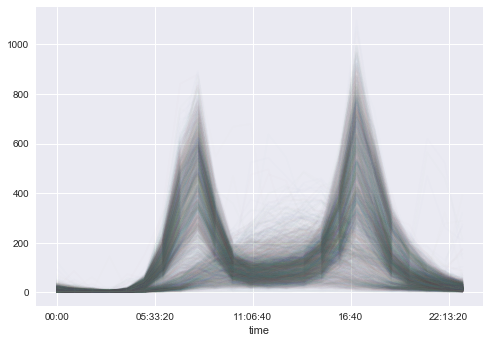

In [21]:
pivoted.plot(legend=False, alpha=0.01) # add transparency to better visualise